<a href="https://colab.research.google.com/github/Deividasbu/MDV/blob/main/Untitled81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional Data Visualization


## Exercise 1
### Choose a multidimensional data set - from MSc thesis research, work, hobbies, or Internet (e.g. UCI Machine Learning Repository). Describe the data set in the report: meaning, numbers and properties of objects (instances) and features (attributes, parameters).

### Data Collection Information
For this project, I utilized the Spotify API to extract data about the Top 200 Global songs.   
The playlist can be accessed through the following link: https://open.spotify.com/playlist/4yNfFAuHcSgzbcSm6q5QDu   
The data extraction was conducted on February 29, 2024, at 17:30.  
Extraction code can be provided upon request.  

In [5]:
# Load dataset
import pandas as pd

df = pd.read_csv('spotify_top_200_24-02-29.csv',index_col=False)
df = df.drop(columns=['Unnamed: 0'])

df.head()

name             album        artist                  genre  \
0  Beautiful Things  Beautiful Things  Benson Boone  singer-songwriter pop   
1          CARNIVAL        VULTURES 1            ¥$                    NaN   
2    TEXAS HOLD 'EM    TEXAS HOLD 'EM       Beyoncé                    pop   
3            greedy            greedy    Tate McRae                  alt z   
4      Cruel Summer             Lover  Taylor Swift                    pop   

  release_date    length  popularity                      id  acousticness  \
0   2024-01-18  3.005067         100  6tNQ70jh4OwmPGpYy6R2o9         0.151   
1   2024-02-09  4.405400          94  3w0w2T288dec0mgeZZqoNN         0.189   
2   2024-02-10  3.927267          86  7AYmToZ5y67fBjq4RLFbuq         0.588   
3   2023-09-15  2.197867          99  3rUGC1vUpkDG9CZFHMur1t         0.256   
4   2019-08-23  2.973767          99  1BxfuPKGuaTgP7aM0Bbdwr         0.117   

   danceability  energy  instrumentalness  liveness  loudness  speechiness  \
0         0.472   0.471          0.000000     0.140    -5.692       0.0603   
1         0.594   0.811          0.000000     0.339    -5.746       0.1590   
2         0.725   0.709          0.000000     0.135    -6.514       0.0720   
3         0.750   0.733          0.000000     0.114    -3.180       0.0319   
4         0.552   0.702          0.000021     0.105    -5.707       0.1570   

     tempo  valence  
0  105.029    0.219  
1  148.144    0.311  
2  110.024    0.353  
3  111.018    0.844  
4  169.994    0.564

In [2]:
# Print information about dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              200 non-null    object 
 1   album             200 non-null    object 
 2   artist            200 non-null    object 
 3   genre             187 non-null    object 
 4   release_date      200 non-null    object 
 5   length            200 non-null    float64
 6   popularity        200 non-null    int64  
 7   id                200 non-null    object 
 8   acousticness      200 non-null    float64
 9   danceability      200 non-null    float64
 10  energy            200 non-null    float64
 11  instrumentalness  200 non-null    float64
 12  liveness          200 non-null    float64
 13  loudness          200 non-null    float64
 14  speechiness       200 non-null    float64
 15  tempo             200 non-null    float64
 16  valence           200 non-null    float64
dt

### Description of the Dataset

### Instances (Objects):
- Each instance represents a track from the Top 200 Global songs playlist accessed through Spotify's API, with details such as the track's name, album, artist, genre, release date, and various audio features.

### Features (Attributes, Parameters):
#### Categorical Features:
- `name`: Name of the track.
- `album`: Album name.
- `artist`: Artist name.
- `genre`: Genre of the track.
- `release_date`: Release date of the track.
- `id`: Spotify ID of the track.

#### Numerical Features:
- `length`: Length of the track in minutes.
- `popularity`: Popularity score of the track.
- `acousticness`: Confidence measure of whether the track is acoustic.
- `danceability`: Describes how suitable the track is for dancing.
- `energy`: Perceptual measure of intensity and activity of the track.
- `instrumentalness`: Predicts whether the track contains no vocals.
- `liveness`: Detects the presence of an audience in the recording.
- `loudness`: Overall loudness of the track in decibels.
- `speechiness`: Detects the presence of spoken words in the track.
- `tempo`: Estimated tempo of the track in beats per minute.
- `valence`: Measure describing the musical positiveness conveyed by the track.

### Data Type:
- `name`, `album`, `artist`, `genre`, `release_date`, and `id` are strings (object data type).
- `length`, `popularity`, `acousticness`, `danceability`, `energy`, `instrumentalness`, `liveness`, `loudness`, `speechiness`, `tempo`, and `valence` are numerical values (float or integer data type).

  
More information on features can be found here:
 https://developer.spotify.com/documentation/web-api/reference/get-audio-features



## Exercise 2
### Visualize multidimensional data set using at least three direct visualization methods. Matlab (Statistical Toolbox), Orange, Visulab, Xmdv, Pandas, or other software may be used. Include at least three images in the report and comment them. Include general conclusions describing insights about the data and comparing results of different methods indicating which one is most useful for the analyzed data.

Original data has too many distinct genres so they are narrowed down to 5 categories.

In [6]:
# Define a refined mapping function to categorize genres into the primary groups
def map_genre_to_primary_category(genre):
    if pd.isna(genre):
        return "Other"
    genre = genre.lower()
    if 'pop' in genre:
        return "Pop"
    elif 'rap' in genre:
        return "Rap"
    elif 'hip hop' in genre:
        return "Hip Hop"
    elif 'rock' in genre:
        return "Rock"
    else:
        return "Other"

# Apply the refined mapping function to the genre column
df['primary_genre'] = df['genre'].apply(map_genre_to_primary_category)

# Display the first few rows to verify the new mapping
df[['genre', 'primary_genre']].head()


genre primary_genre
0  singer-songwriter pop           Pop
1                    NaN         Other
2                    pop           Pop
3                  alt z         Other
4                    pop           Pop

In [ ]:
df.primary_genre.value_counts()

Other      80
Pop        68
Hip Hop    25
Rock       15
Rap        12
Name: primary_genre, dtype: int64

Numerical features are normalised

In [4]:
from sklearn.preprocessing import MinMaxScaler

# List of column names to normalize
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence', 'loudness', 'tempo']

features_to_normalize = df[features].copy()

scaler = MinMaxScaler()

# Fit the scaler to the data and transform the features
normalized_features = scaler.fit_transform(features_to_normalize)

# Create a DataFrame from the normalized features
normalized_df = pd.DataFrame(normalized_features, columns=features)
normalized_df['primary_genre'] = df['primary_genre']
normalized_df.head()

acousticness  danceability    energy  instrumentalness  liveness  \
0      0.155824      0.250000  0.434718          0.000000  0.130857   
1      0.195040      0.444268  0.823778          0.000000  0.372420   
2      0.606808      0.652866  0.707060          0.000000  0.124788   
3      0.264184      0.692675  0.734523          0.000000  0.099296   
4      0.120736      0.377389  0.699050          0.000023  0.088371   

   speechiness   valence  loudness     tempo primary_genre  
0     0.081574  0.184184  0.774801  0.275085           Pop  
1     0.298593  0.288717  0.771307  0.591352         Other  
2     0.107300  0.336439  0.721607  0.311726           Pop  
3     0.019129  0.894330  0.937358  0.319017         Other  
4     0.294195  0.576185  0.773830  0.751630           Pop

### Parallel Coordinates Plot

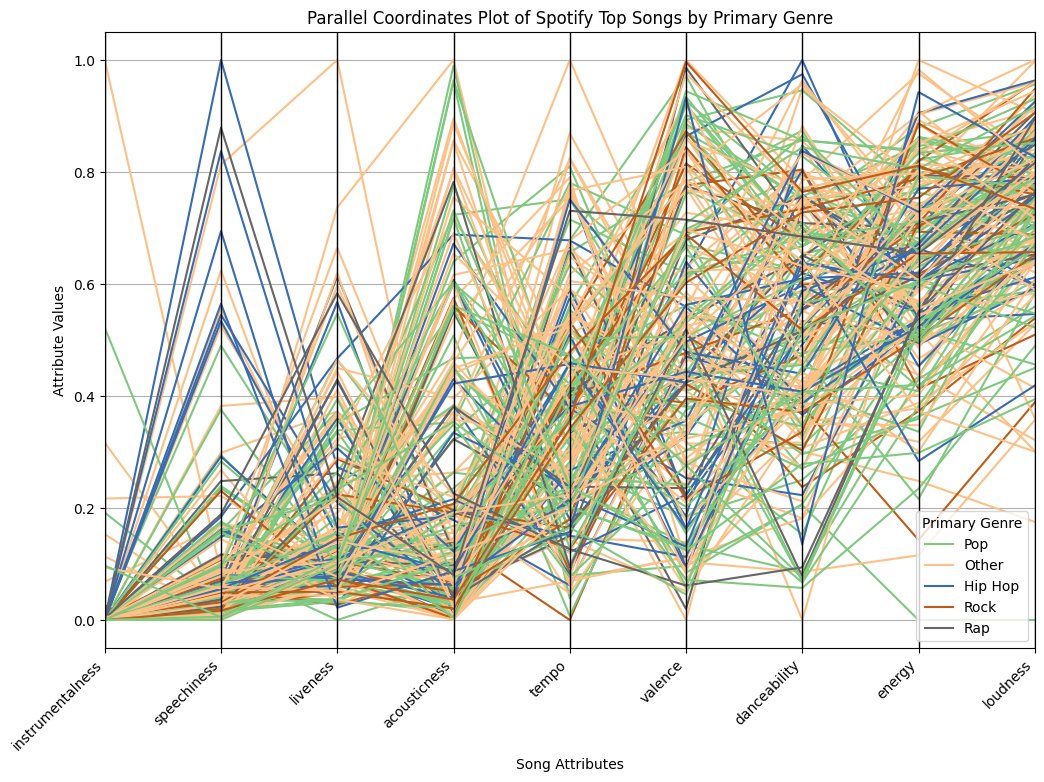

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

columns_order = ['instrumentalness',	'speechiness',	'liveness',	'acousticness',	'tempo', 'valence',	'danceability',	'energy',	'loudness', 'primary_genre'	]


# Plotting Parallel Coordinates
plt.figure(figsize=(12, 8))
parallel_coordinates(normalized_df[columns_order], class_column='primary_genre', colormap='Accent', alpha=1)
plt.xticks(rotation=45, ha="right")
plt.title('Parallel Coordinates Plot of Spotify Top Songs by Primary Genre')
plt.xlabel('Song Attributes')
plt.ylabel('Attribute Values')
plt.grid(True)
plt.legend(title='Primary Genre')
plt.show()

No clear genre separability can be seen prom the visualization.  
We could only state that Hip Hop more often that other genres have higher speechiness.

###Pairplot

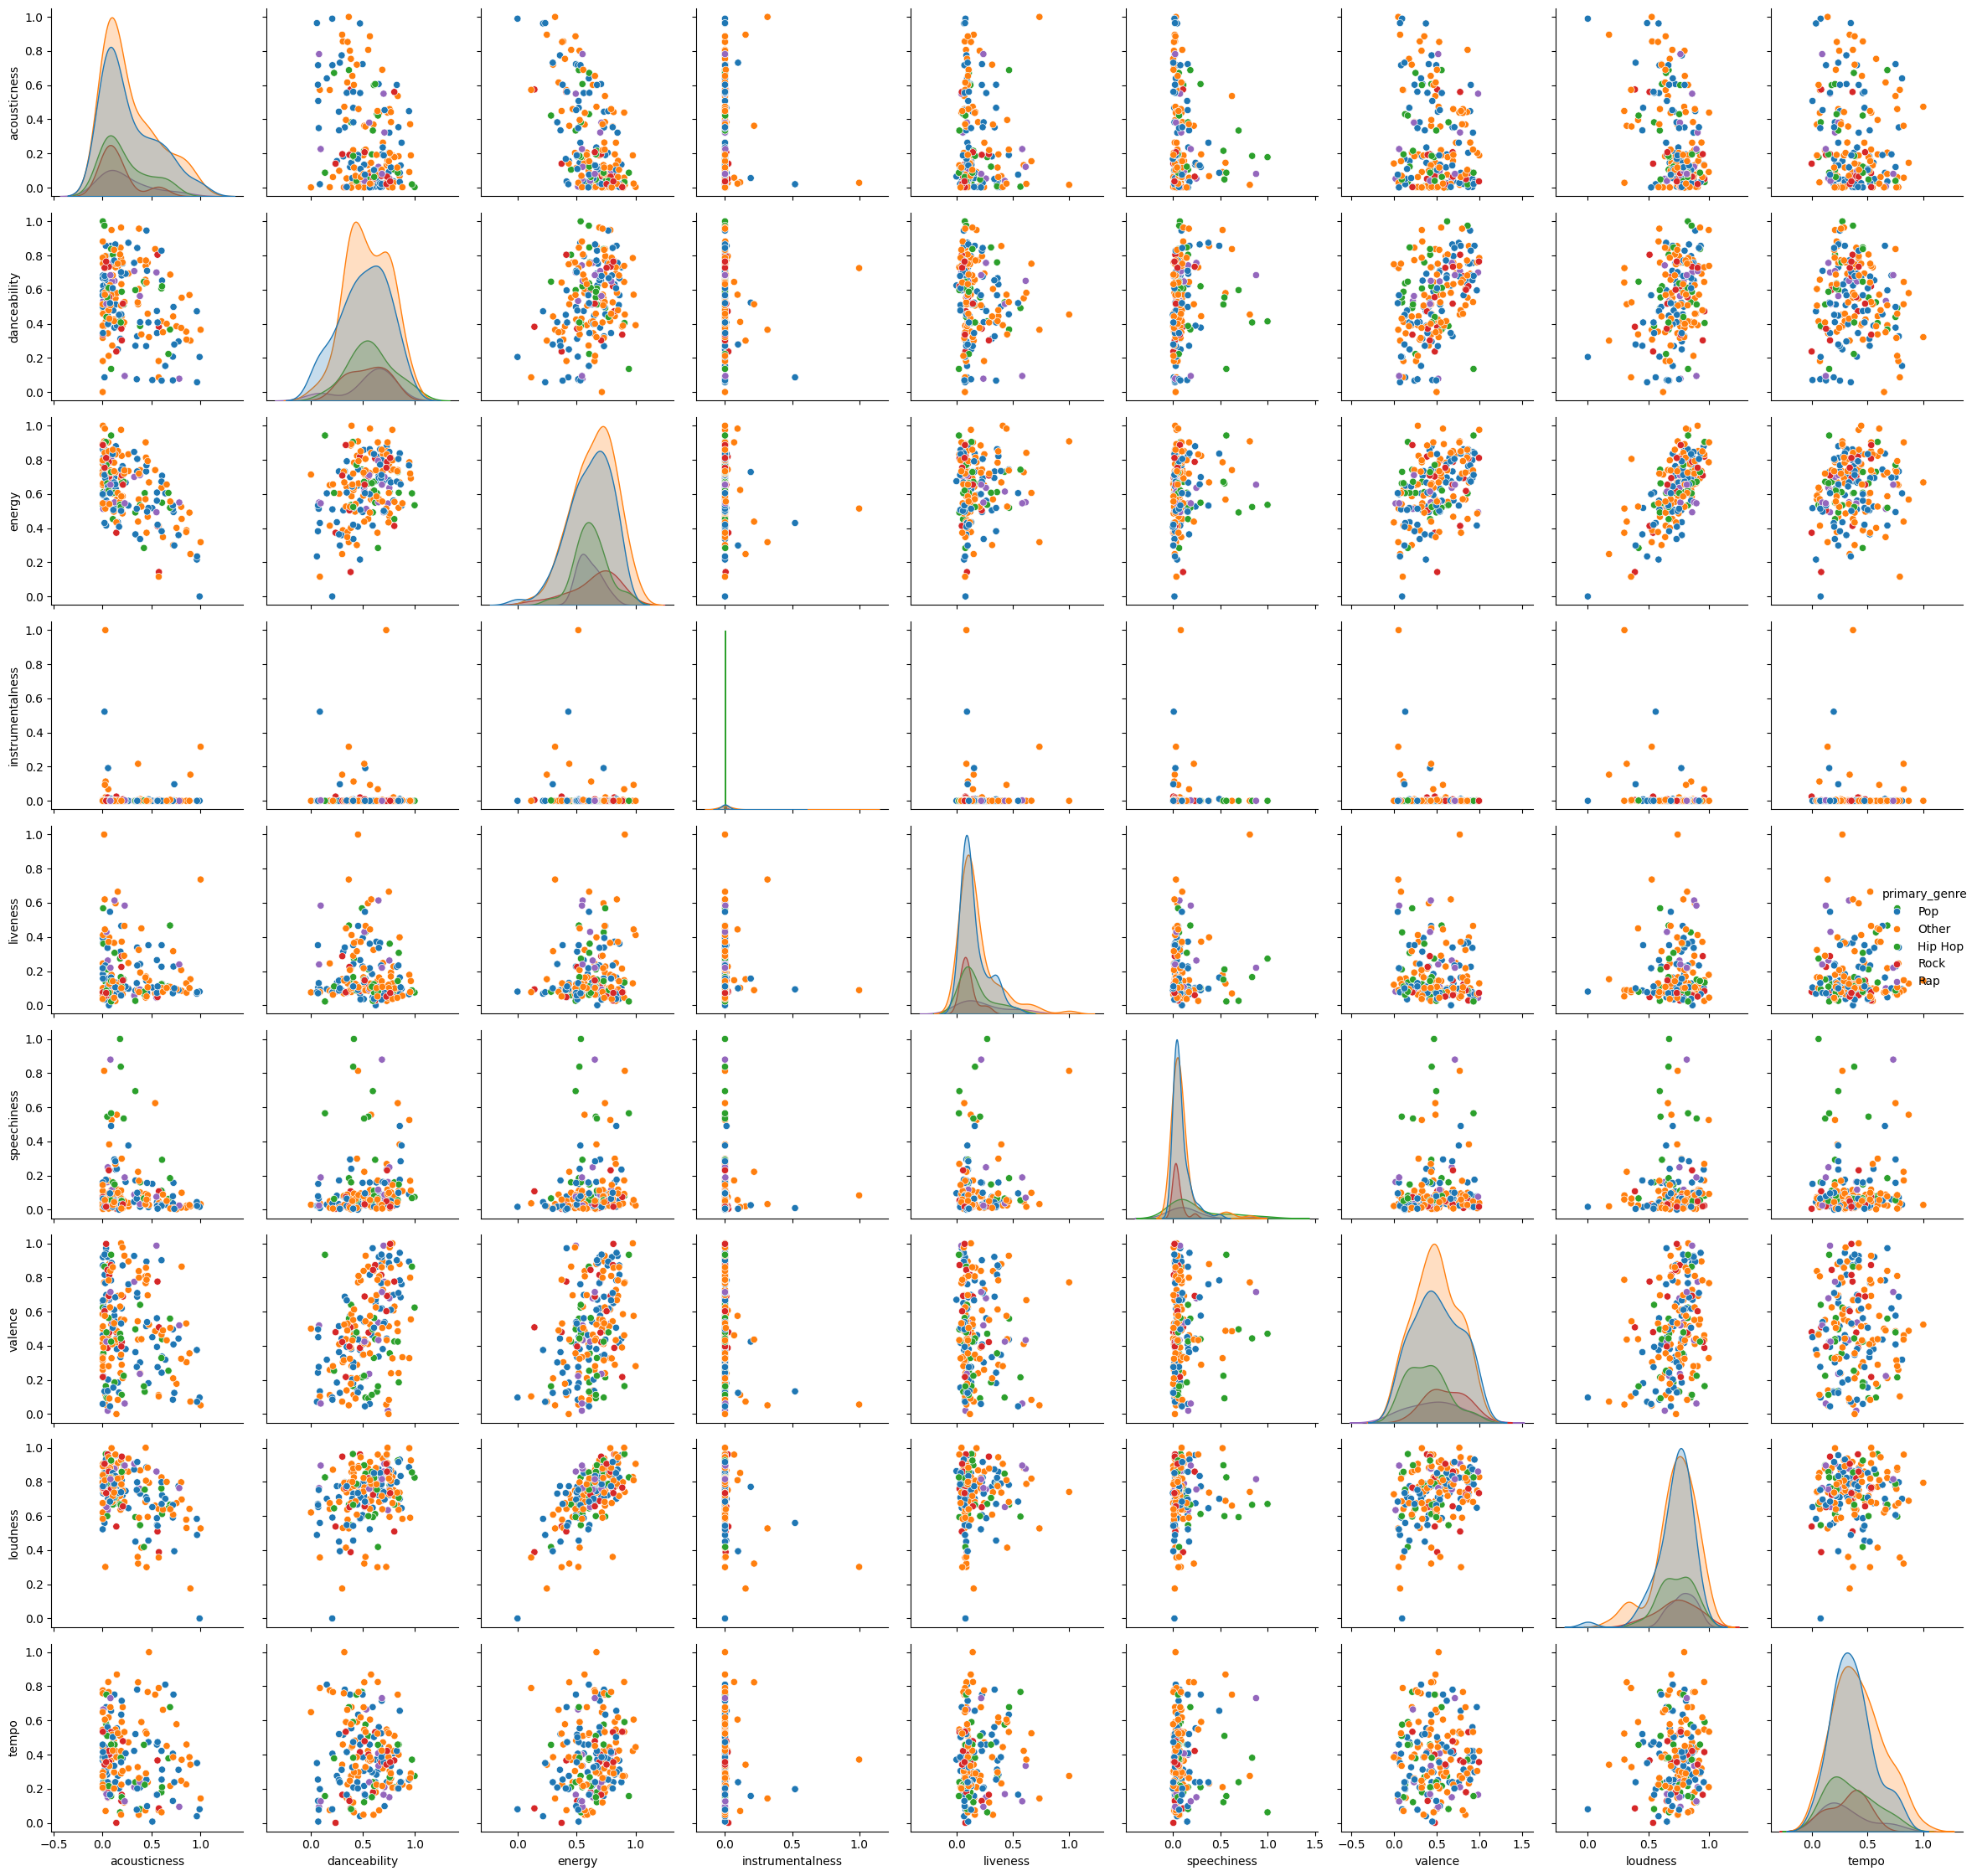

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the Scatter Plot Matrix with seaborn's pairplot function
sns.pairplot(normalized_df, hue='primary_genre', palette='tab10', diag_kind='kde')

# Adjust the aesthetics and display the plot
plt.tight_layout()
plt.show()


Also, no genre separability can be seen from the visualization.

### Radviz plot
Plot 1: Rhythm-related features (tempo, danceability, energy)  
Plot 2: Vocal-related features (speechiness, acousticness, liveness)  
Plot 3: Other sonic qualities (instrumentalness, loudness, valence)

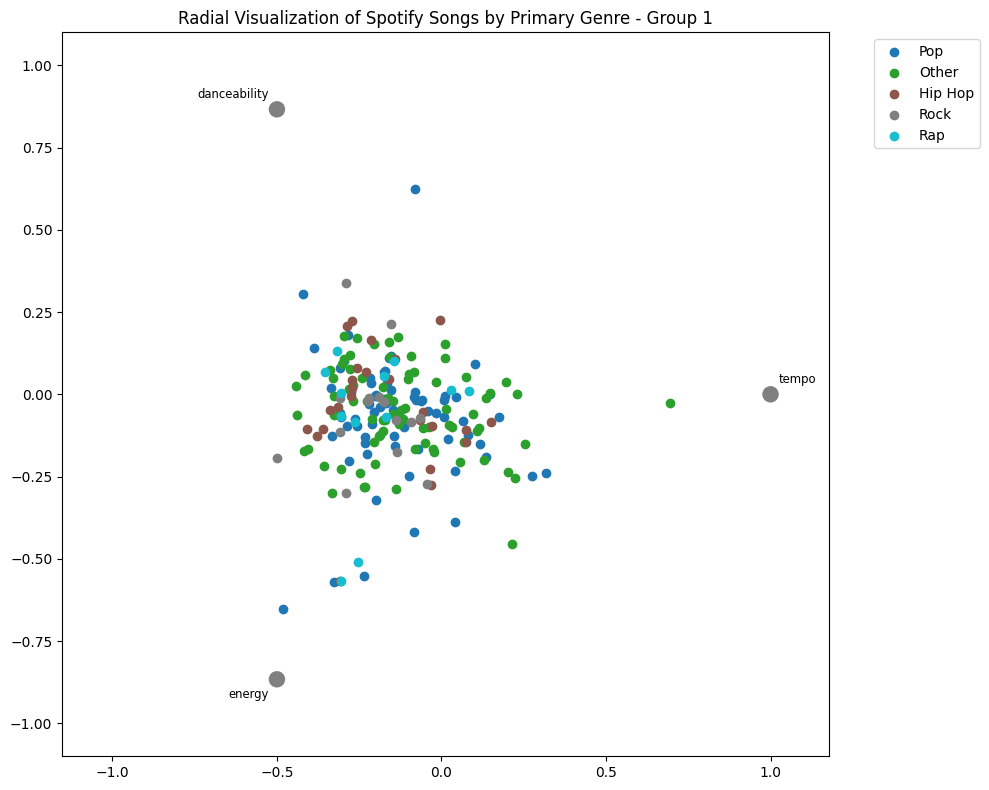

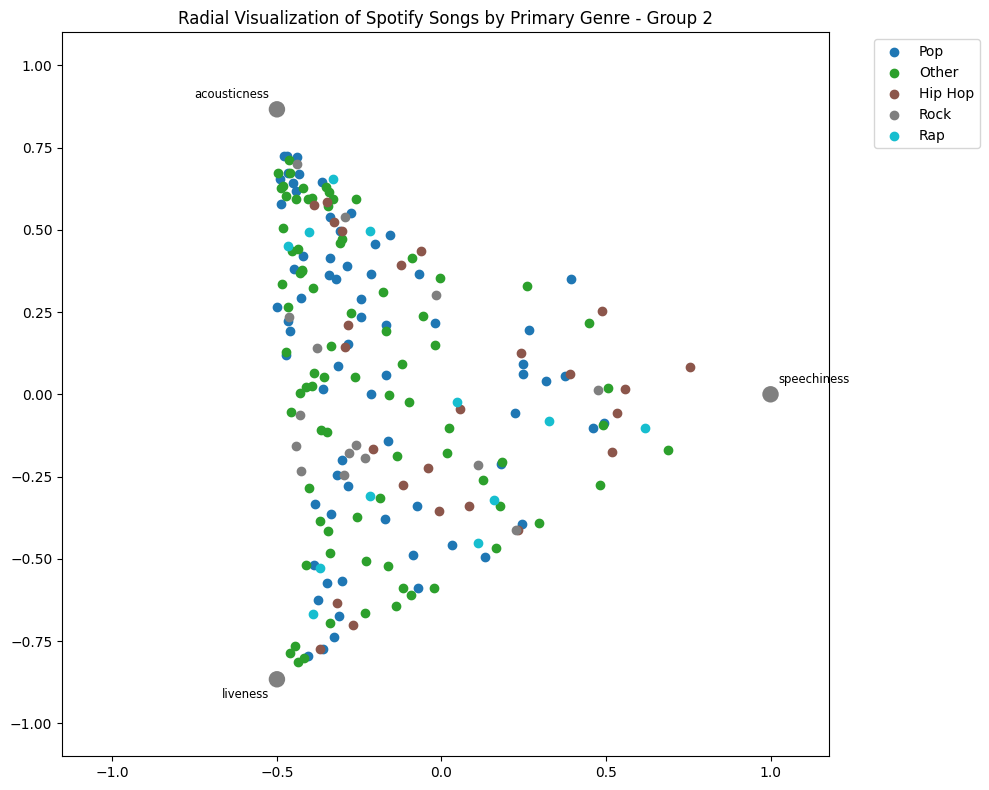

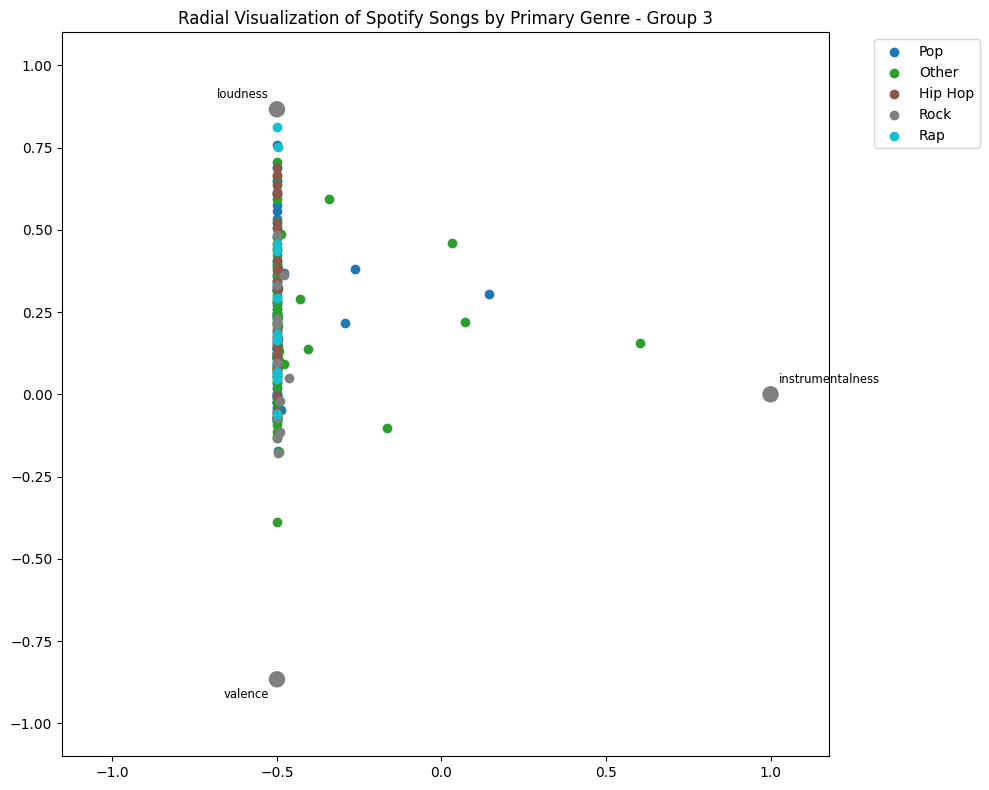

In [ ]:
from pandas.plotting import radviz
import matplotlib.pyplot as plt

# Define the subsets of features for each plot
feature_groups = [
    ['tempo', 'danceability', 'energy'],
    ['speechiness', 'acousticness', 'liveness'],
    ['instrumentalness', 'loudness', 'valence']
]

# Plot each group of features using RadViz
for i, features in enumerate(feature_groups, start=1):
    # Prepare the data for RadViz
    radviz_data = normalized_df[features + ['primary_genre']].copy()

    # Plotting RadViz
    plt.figure(figsize=(10, 8))
    radviz(radviz_data, 'primary_genre', colormap='tab10')
    plt.title(f'Radial Visualization of Spotify Songs by Primary Genre - Group {i}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Genres show no separability neither when looking at Rhythm-related features, nor at Vocal-related or Other sonic features.  


### Explanation of the results


1. Genres often share musical characteristics, leading to an inherent overlap in their feature distributions. For example, pop and rock songs might share similar tempo ranges or energy levels. This overlap can make it challenging to visually separate genres based solely on certain features.

2. The selected features might not capture the nuances that distinguish genres. While features like tempo, energy, and danceability provide a quantitative measure of song characteristics, they may not encapsulate the full spectrum of what differentiates genres. More subtle or complex features, such as specific rhythmic patterns, chord progressions, or lyrical content, could be more informative but are harder to quantify and were not included in the analysis.

3. Data Quality and Representation
The dataset's quality and how well it represents each genre can significantly impact the analysis. If there are inaccuracies in genre labeling, a limited number of tracks per genre, or a lack of diversity in the selected songs, these factors could contribute to the difficulty in visualizing separability between genres.

4. Complexity of Musical Genres
Musical genres are complex and often subjective categories that can be influenced by cultural, historical, and personal factors. The boundaries between genres can be fluid, with many songs and artists drawing influences from multiple genres.

## Exercise 3
### Perform Principal Component Analysis on multidimensional data set. Determine, what percentage of the total variance is in each component, what percentage is within two principal components. Visualize two principal components using a scatter plot. Orange, Matlab, octave, or other software may be used. Include the image in the report and compare with the results of direct visualization, also include general conclusions.

Features normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# List of column names to normalize
features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'speechiness', 'valence', 'loudness', 'tempo']

features_to_normalize = df[features].copy()

scaler = MinMaxScaler()

# Fit the scaler to the data and transform the features
normalized_features = scaler.fit_transform(features_to_normalize)

# Create a DataFrame from the normalized features
normalized_df = pd.DataFrame(normalized_features, columns=features)
normalized_df['primary_genre'] = df['primary_genre']
normalized_df.head()

PCA for all components

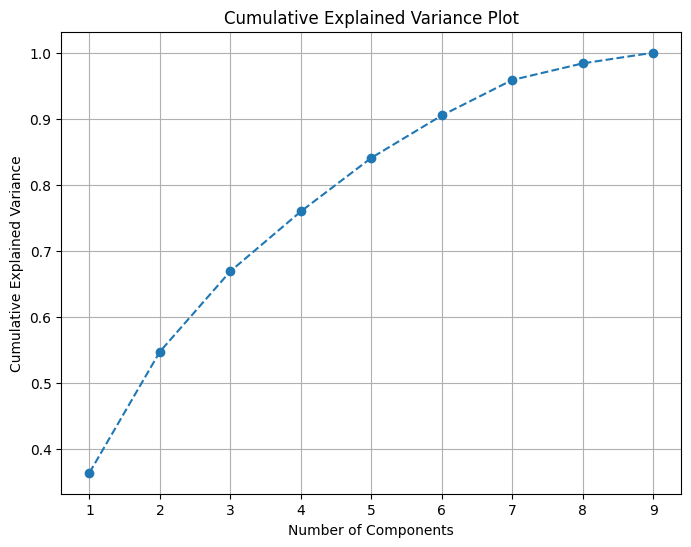

Component 1: Cumulative Explained Variance = 0.3644
Component 2: Cumulative Explained Variance = 0.5476
Component 3: Cumulative Explained Variance = 0.6693
Component 4: Cumulative Explained Variance = 0.7598
Component 5: Cumulative Explained Variance = 0.8408
Component 6: Cumulative Explained Variance = 0.9050
Component 7: Cumulative Explained Variance = 0.9587
Component 8: Cumulative Explained Variance = 0.9838
Component 9: Cumulative Explained Variance = 1.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA model with all components
pca = PCA(n_components=None)
principal_components = pca.fit_transform(normalized_df[features])

# Calculate cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1),
         cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

# Print the cumulative explained variance for each component
for i, cum_var in enumerate(cumulative_explained_variance, start=1):
    print(f'Component {i}: Cumulative Explained Variance = {cum_var:.4f}')


**Component 1** explains 36.44% of the variance.  
**Component 2** explains an additional 18.32% of the variance.  
Together, Components 1 and 2 explain **54.76% of the total variance**.  
  
**Interpretation:**
By reducing the dimensionality to two principal components, we'll retain approximately 54.76% of the information from the original dataset.

Scatterplot for two components

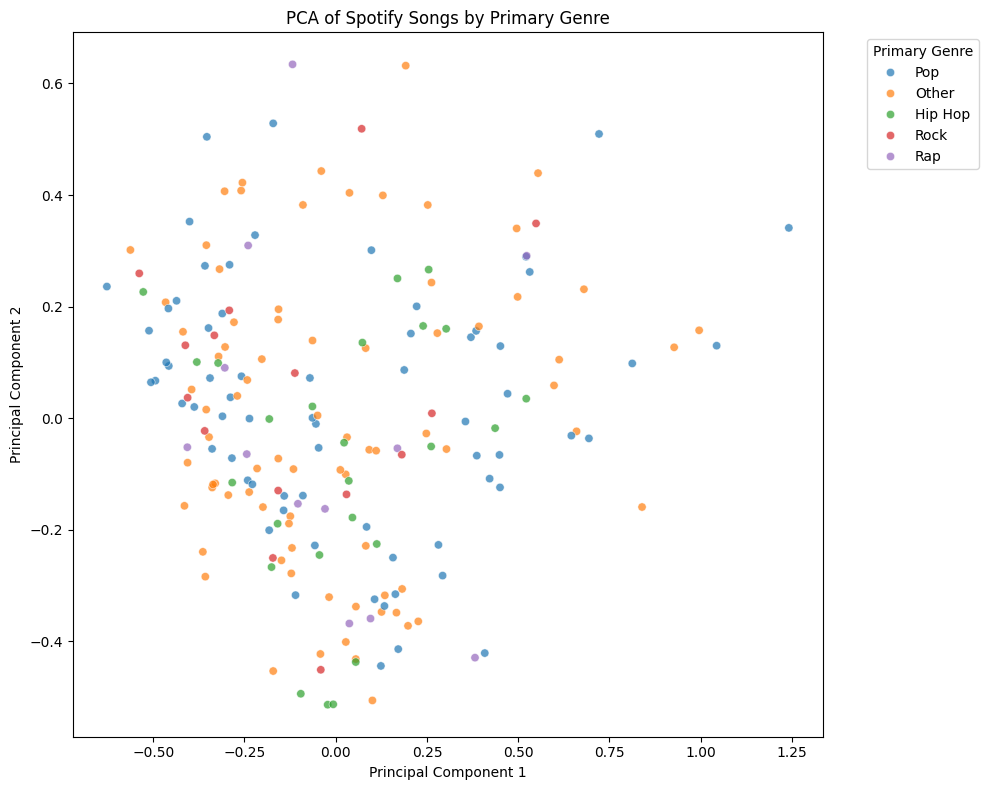

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_df[features])

# Convert to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['primary_genre'] = normalized_df['primary_genre']

# Scatterplot of the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='primary_genre', data=pca_df, palette='tab10', alpha=0.7)
plt.title('PCA of Spotify Songs by Primary Genre')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Primary Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Conclusions and Interpretation

It can be seen from the scatterplot that dimensionality reduction did not help to see the serarability of genres either.

Although genres do not separate distinctly, some clustering is visible. For instance:  
Pop (blue) is more concentrated toward the center-left.  
Hip Hop (green) is scattered widely but less dense in the lower half.  
Rock (red) appears more centered.  
Genres such as 'Other' and 'Rap' overlap significantly.  

The results are the same as in the Direct visualization case - song features overlap and it is hard to see the differences within genres. Also, selected features might not capture the nuances that distinguish genres.

## Exercise 4
### Visualize multidimensional data set using Multidimensional Scaling. Investigate, how images are different when different initial solutions are specified. Orange, Matlab (drtoolbox, Sammon), SMACOF, Smooth 4.0, or other software and algorithms may be used. Include and compare at least two images in the report. Compare the results with that of previous excercises, include general conclusions.

### MDS of Spotify songs colored by Genre

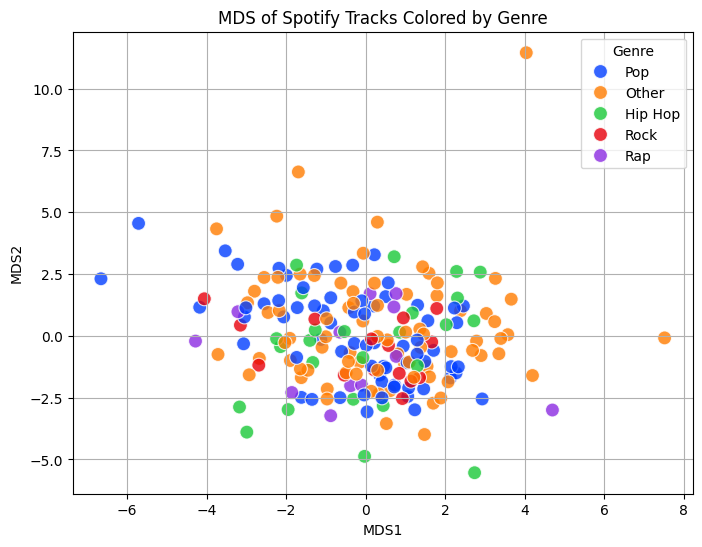

In [18]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
            'liveness', 'speechiness', 'valence', 'loudness', 'tempo', 'primary_genre']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_to_scale = df[features].copy()

data_scaled = scaler.fit_transform(features_to_scale.iloc[:, :-1])

# Applying MDS
mds = MDS(n_components=2, random_state=0, normalized_stress='auto')
X_mds = mds.fit_transform(data_scaled)

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=features_to_scale['primary_genre'], palette='bright', s=100, alpha=0.8)
plt.title('MDS of Spotify Tracks Colored by Genre')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.legend(title='Genre')
plt.grid(True)
plt.show()

### Interpretation
- **Cluster Overlap**: The plot shows some overlap among genres, indicating that tracks from different genres can share similar audio characteristics. For example, it seems that some Pop, Hip Hop, and Rap tracks are located close to each other, suggesting similarities in certain musical elements like tempo, energy, or danceability.  
- **Distinct Points**: There are a few tracks (colored dots) that stand apart from the main cluster. These might represent songs that are unusual for their genre or that possess unique audio features.  

### MDS of Spotify songs colored by feture level

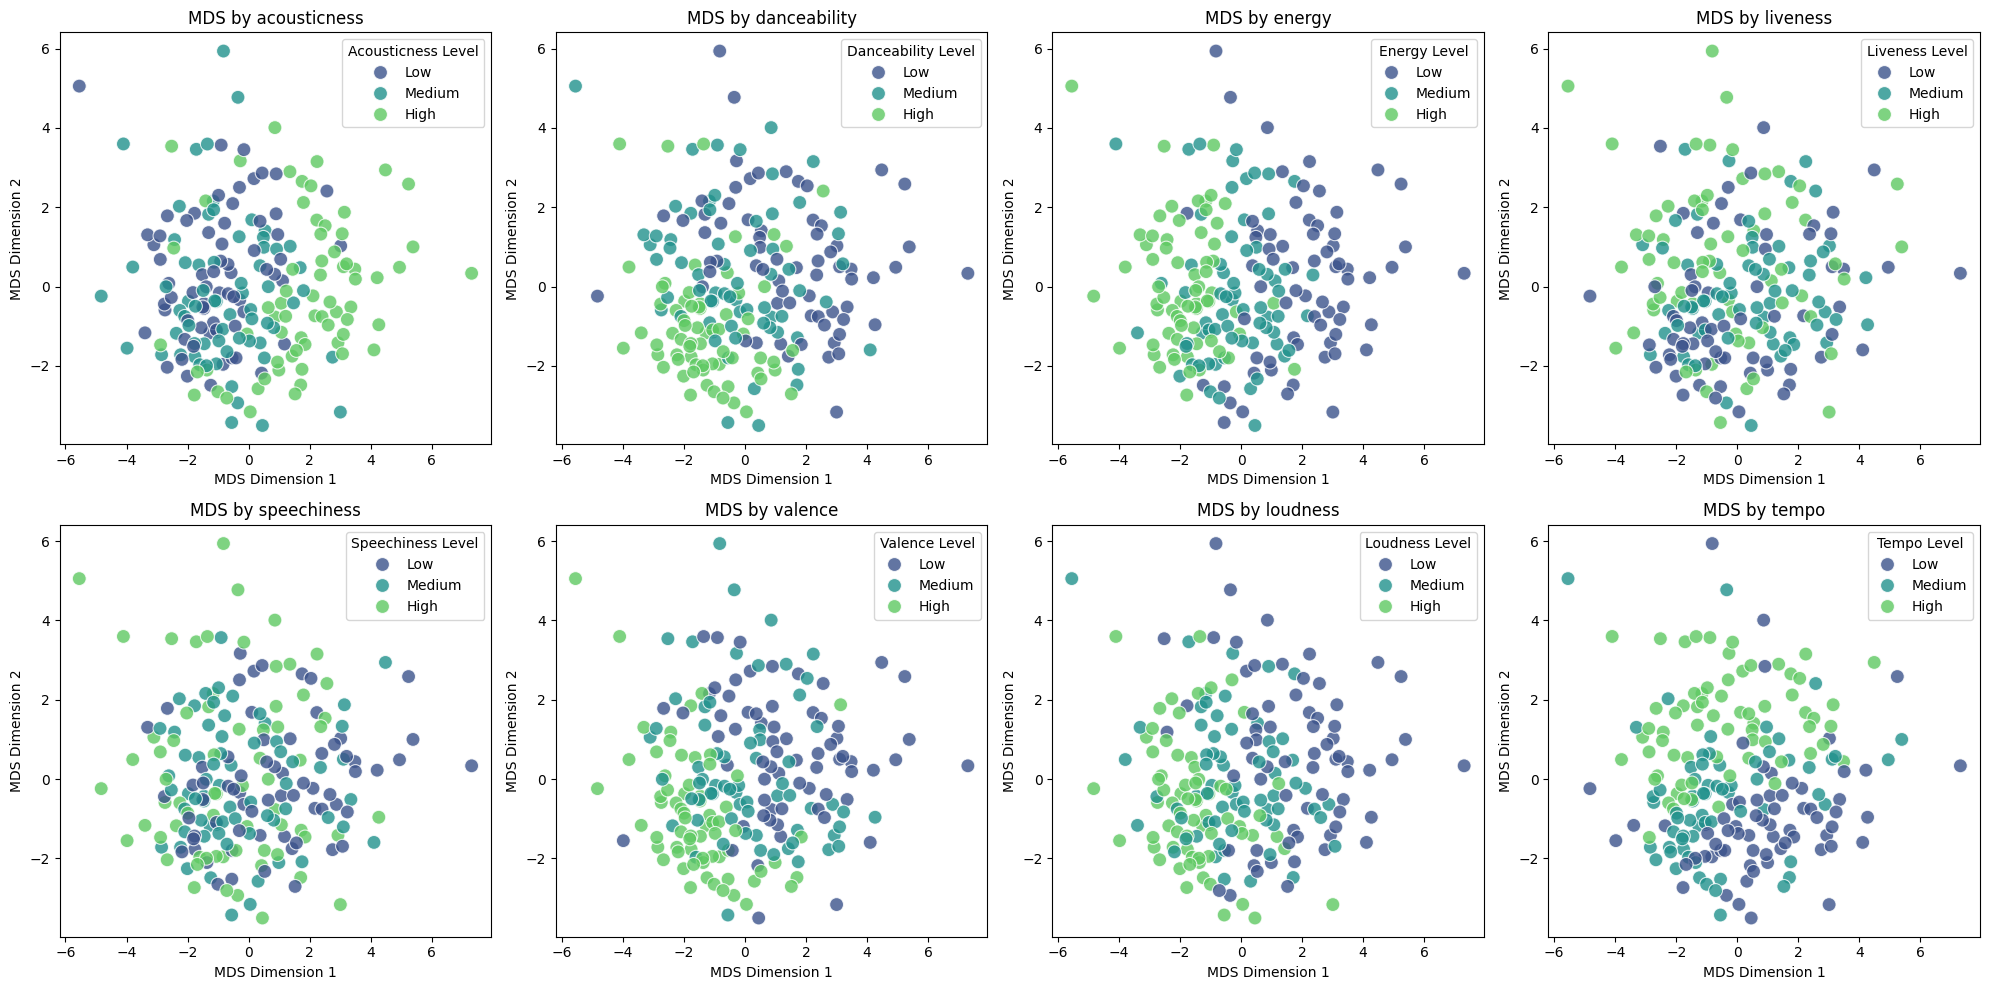

In [20]:
features = ['acousticness', 'danceability', 'energy',
            'liveness', 'speechiness', 'valence', 'loudness', 'tempo']

features_to_scale = df[features].copy()

features_scaled = scaler.fit_transform(features_to_scale)

mds = MDS(n_components=2, random_state=42, normalized_stress='auto')
mds_results = mds.fit_transform(features_scaled)

features_to_scale['mds1'] = mds_results[:, 0]
features_to_scale['mds2'] = mds_results[:, 1]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, feature in zip(axes, features_to_scale.columns):
    # Handle features with limited diversity using pd.cut or pd.qcut appropriately
    try:
        # Try using qcut, but revert to cut if there are not enough unique bins
        feature_labels = pd.qcut(df[feature], q=3, labels=["Low", "Medium", "High"])
    except ValueError:
        bins = np.linspace(df[feature].min(), df[feature].max(), 4)
        feature_labels = pd.cut(df[feature], bins=bins, labels=["Low", "Medium", "High"], include_lowest=True)

    sns.scatterplot(x='mds1', y='mds2', hue=feature_labels, data=features_to_scale, palette='viridis', s=100, alpha=0.8, ax=ax)
    ax.set_title(f'MDS by {feature}')
    ax.set_xlabel('MDS Dimension 1')
    ax.set_ylabel('MDS Dimension 2')
    ax.legend(title=f'{feature.capitalize()} Level')

plt.tight_layout()
plt.show()

### Interpretation
The MDS analysis of the top 100 songs reveals distinct patterns in how certain audio features influence song clustering. **Energy**, **danceability**, and **loudness** show the strongest clustering effects, suggesting these features are pivotal in the composition and popularity of tracks, with energetic and louder songs tending to cluster together, indicative of their appeal in popular music. Features like **instrumentalness** and **speechiness** exhibit more diverse distributions, indicating a broader variety across the songs without significant clustering, suggesting these features vary more independently among the top tracks. Meanwhile, medium and high **tempo** songs as well as those with higher **valence** also show some clustering, likely reflecting commonalities in rhythm and positive moods that resonate with listeners

### Comparison between MDS and PCA
**PCA Clustering**: In the PCA plot, we can observe that there's some degree of clustering by genre, but it's not very pronounced. The points are scattered, and while there's some grouping (e.g., Hip Hop and Rap might cluster a bit), the boundaries between genres like Pop, Rock, and Others are quite diffuse.

**MDS Clustering**: The MDS plot shows a somewhat similar pattern to PCA in terms of clustering by genre, with a central aggregation where most genres overlap. However, MDS seems to display a slightly better separation among some genres, notably between some Rap, Hip Hop, and Pop songs as compared to Rock and Others.

Both PCA and MDS show overlaps among genres, reflecting the inherent similarity in musical attributes across genres like Pop, Hip Hop, and Rock. However, MDS seems to offer a slight advantage in depicting these as separate clusters, possibly due to its focus on preserving the 'distances' or 'dissimilarities' rather than just the variance.

## General Conclusions

This project explored the multidimensional dataset of the top 200 global songs from Spotify, focusing on a variety of audio features such as acousticness, danceability, energy, and more. Principal Component Analysis (PCA) and Multidimensional Scaling (MDS) were used to visualize the data, aiming to understand the relationship between songs and their genres based on these features.

**Feature Analysis**: Both PCA and MDS provided insights into how songs cluster based on their audio features. Features like energy, danceability, and loudness showed clustering effects, suggesting that these attributes are critical in defining the musicality and appeal of the tracks.

**Genre Clustering**: While PCA aimed at reducing dimensionality while preserving variance, it showed scattered clustering of genres, indicating overlaps and a shared musical structure across different genres. MDS, focusing on preserving the actual distances between data points, depicted slightly clearer separations among genres, particularly between genres such as Pop, Hip Hop, and Rap, as compared to Rock and Others.

**Visualization Insights**: Through the use of color-coded plots, both PCA and MDS visualizations revealed that despite some genre-based clustering, there is a considerable overlap among different genres. This suggests a convergence in musical features across genres in the top charts.

**Challenges in Genre Distinction**: The visualizations also highlighted the inherent challenge in distinctly separating musical genres based solely on audio features. Musical genres are not only defined by their audio characteristics but also by cultural, lyrical, and historical contexts which are hard to capture through purely instrumental features.

**MDS for song features**: While MDS showed overlap in genre separation based on musical features, it showed better separation results when looking into song separation based on musical feature level (Low, Medium, High). It should have been interesting to do the same approach with PCA and to compare these results as well.


Overall, this analysis underscores the complexity of defining and distinguishing musical genres based on audio features alone. It also showcases the utility of techniques like PCA and MDS in providing meaningful insights into large music datasets, which can be valuable for various applications in the music industry, including genre classification, music recommendation, and market analysis.



